In [251]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings as warn
warn.filterwarnings("ignore")
import plotly.express as px
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 1. Exploratory Data Analysis(EDA)

### 1.1 Load the data

In [252]:
df = pd.read_csv('housing.csv')

### 1.2 Inspecting the data

In [253]:
df.head(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY


In [254]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB


In [255]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 1.3 Detecting missing values

In [256]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### 1.4 Checking duplicates

In [257]:
df.duplicated().sum()

np.int64(0)

### 1.5 Plots

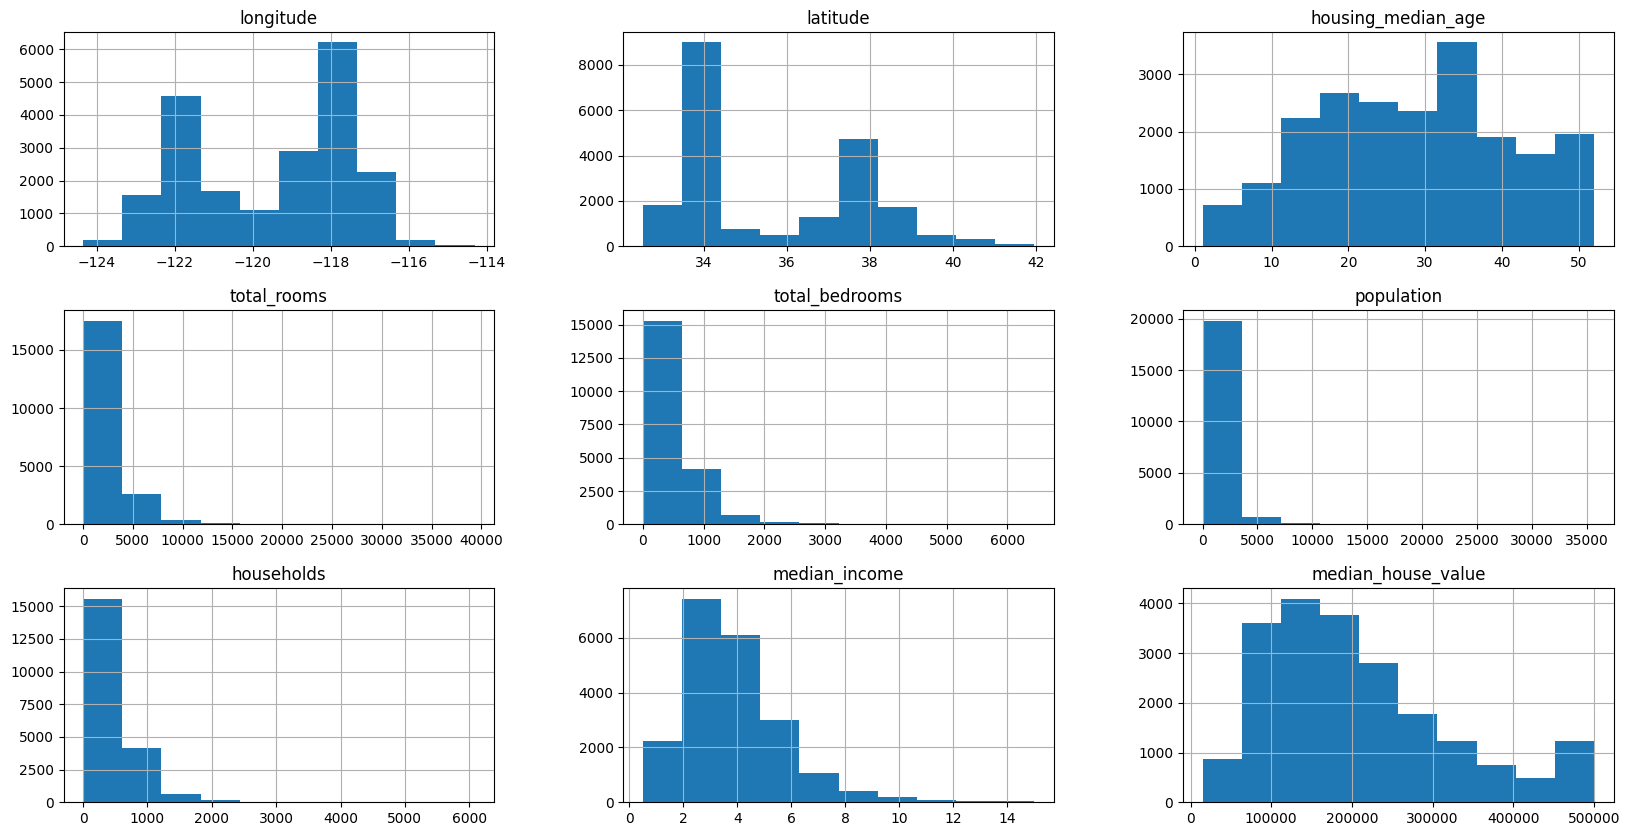

In [258]:
df.hist(figsize=(20, 10))
plt.show()

In [259]:
# Visualizing geographical distribution of median house values
fig = px.scatter_map(
    df,
    lat="latitude",
    lon="longitude",
    hover_name="ocean_proximity",
    color="median_house_value",
    zoom=6,
    height=650,
    map_style="open-street-map"
)
fig.show()


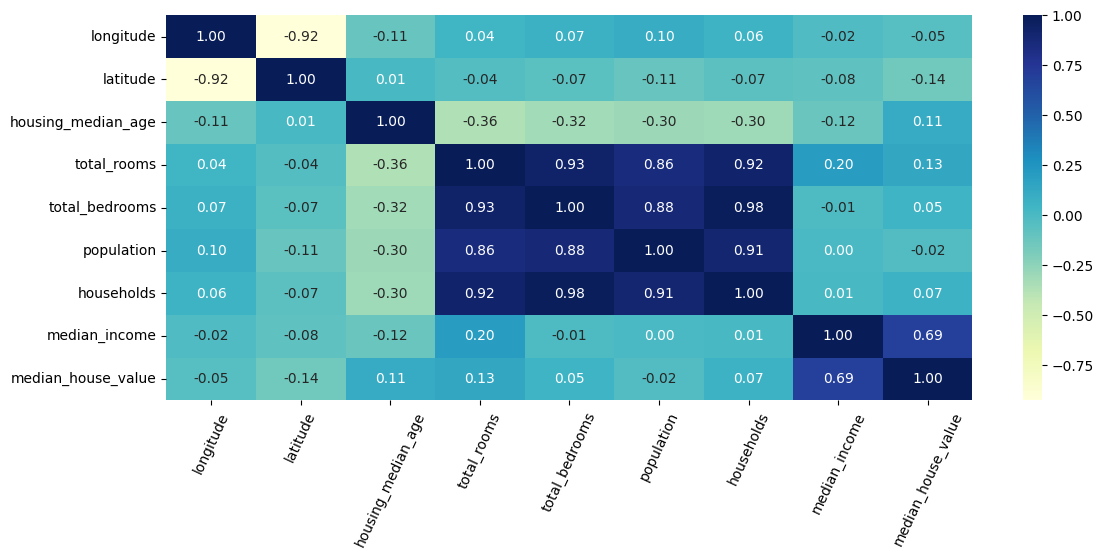

In [260]:
# Correlation heatmap of numerical features in the training data

plt.figure(figsize=(13, 5))
sns.heatmap(df.select_dtypes("number").corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.xticks(rotation=65)
plt.show()

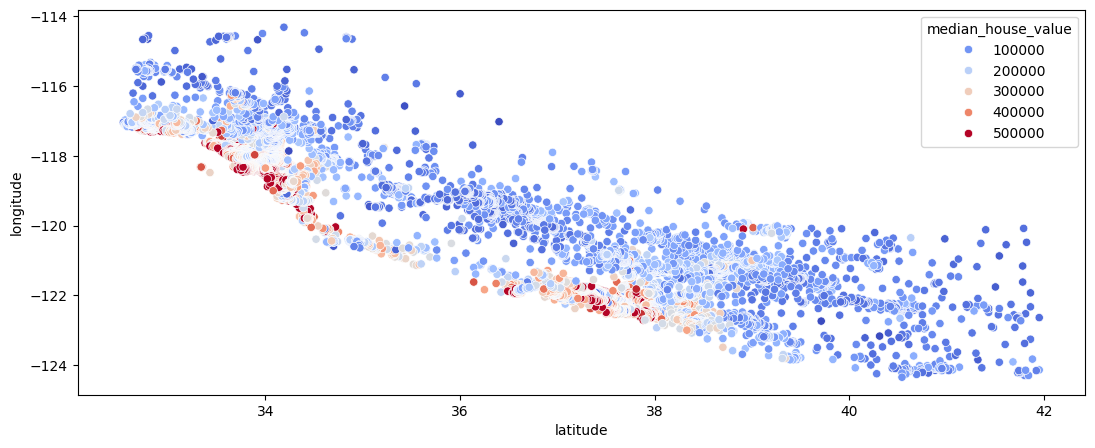

In [261]:
# Geographical scatter plot colored by median house value
plt.figure(figsize=(13, 5))
sns.scatterplot(x="latitude", y="longitude", data=df, hue="median_house_value", palette="coolwarm")
plt.show()

# 2. Data Cleaning

### 2.1 Handling missing values

In [262]:
df.dropna(inplace=True)

### 2.1 Removing duplicates

In [263]:
df.drop_duplicates(inplace=True)

In [264]:
df.shape

(20433, 10)

# 3. Feature Engineering

In [265]:
# Since the distribution is right skewed we will apply log transformation to the target variable "median_house_value" to make it more normally distributed

df["total_rooms"] = np.log(df["total_rooms"] + 1)
df["total_bedrooms"] = np.log(df["total_bedrooms"] + 1)
df["population"] = np.log(df["population"] + 1)
df["households"] = np.log(df["households"] + 1)
df["median_income"] = np.log(df["median_income"] + 1)

In [266]:
# Adding some feature from the exsting ones

df["bedroom_ratio"] = df["total_bedrooms"]/df["total_rooms"]
df["household_rooms"] = df["total_rooms"]/df["households"]
df["population_per_household"] = df["population"]/df["households"]
df["income_per_household"] = df["median_income"]/df["households"]


### 3.1 Encoding


In [267]:
le = LabelEncoder()
df["ocean_proximity"] = le.fit_transform(df["ocean_proximity"])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_ratio,household_rooms,population_per_household,income_per_household
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,3,0.717813,1.399834,1.192698,0.460907
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,3,0.790429,1.260013,1.106019,0.316879
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,3,0.720313,1.407171,1.198157,0.407410
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,3,0.764097,1.325768,1.172893,0.351077
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,3,0.762444,1.329892,1.139895,0.283813


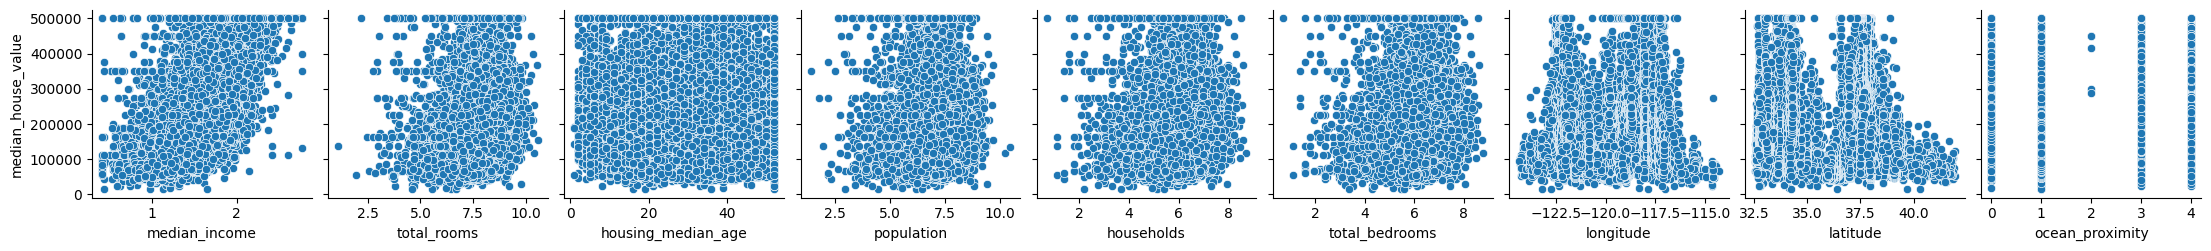

In [268]:
# Check whether the "ocea_proximity" feature has a linear relationwith the target variable "median_house_value" or not after label encoding
sns.pairplot(x_vars=['median_income', 'total_rooms', 'housing_median_age', 'population', 'households', 'total_bedrooms', 'longitude', 'latitude', 'ocean_proximity'],
             y_vars='median_house_value', data=df, kind="scatter")
plt.show()

In [269]:
ohe = OneHotEncoder(sparse_output=False)
encoded_df = ohe.fit_transform(df[["ocean_proximity"]])

In [270]:
df = df.join(pd.DataFrame(encoded_df, columns=ohe.get_feature_names_out(["ocean_proximity"])))
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_ratio,household_rooms,population_per_household,income_per_household,ocean_proximity_0,ocean_proximity_1,ocean_proximity_2,ocean_proximity_3,ocean_proximity_4
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,3,0.717813,1.399834,1.192698,0.460907,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,3,0.790429,1.260013,1.106019,0.316879,0.0,0.0,0.0,1.0,0.0


In [271]:
#df.head()

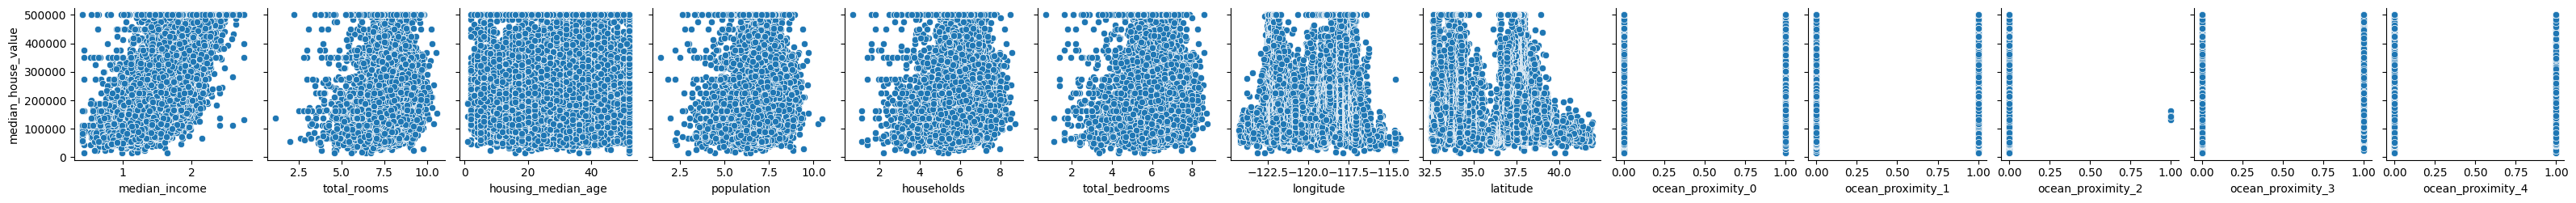

In [272]:
# Check whether the "ocea_proximity" feature has a linear relationwith the target variable "median_house_value" or not after OneHotEncoding
sns.pairplot(x_vars=['median_income', 'total_rooms', 'housing_median_age', 'population', 
'households', 'total_bedrooms', 'longitude', 'latitude', 'ocean_proximity_0', 
'ocean_proximity_1', 'ocean_proximity_2', 'ocean_proximity_3', 'ocean_proximity_4'], 
             y_vars='median_house_value', data=df, kind="scatter")
plt.show()  

In [273]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_ratio,household_rooms,population_per_household,income_per_household,ocean_proximity_0,ocean_proximity_1,ocean_proximity_2,ocean_proximity_3,ocean_proximity_4
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,3,0.717813,1.399834,1.192698,0.460907,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,3,0.790429,1.260013,1.106019,0.316879,0.0,0.0,0.0,1.0,0.0


In [274]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'bedroom_ratio',
       'household_rooms', 'population_per_household', 'income_per_household',
       'ocean_proximity_0', 'ocean_proximity_1', 'ocean_proximity_2',
       'ocean_proximity_3', 'ocean_proximity_4'],
      dtype='str')

In [275]:
"""Since the "ocean_proximity" has non-linear relation with the target 
we will drop it from the entire dataset.""" 

df.drop(columns=["ocean_proximity", "ocean_proximity_0",
       'ocean_proximity_1', 'ocean_proximity_2', 'ocean_proximity_3',
       'ocean_proximity_4'], inplace=True)

In [276]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,household_rooms,population_per_household,income_per_household
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,0.717813,1.399834,1.192698,0.460907
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,0.790429,1.260013,1.106019,0.316879
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,0.720313,1.407171,1.198157,0.407410


# 4. Train Test Split

In [277]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [279]:
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

y_train_s = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_s = scaler.transform(y_test.values.reshape(-1,1)).ravel()

# 5. Model Building & Evaluation

### 5.1 Test Possible Moodels

In [280]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}


results = []

for name, model in models.items():
    # Since "Decision Tree", "Random Forest", "Gradient Boosting", "Bagging Regressor" don't need scaling, we will fit them on the original data, while the rest of the models will be fitted on the scaled data.
    if name in ["Decision Tree", "Random Forest", "Gradient Boosting", "Bagging Regressor"]:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    else:
        model.fit(X_train_s, y_train)
        preds = model.predict(X_test_s)

    score = model.score(X_test_s, y_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)

    results.append([name, r2, mae, score])

df_results = pd.DataFrame(results, columns=["Model", "R2 Score", "MAE", "Score"])
df_results


df_results.sort_values(by="R2 Score", ascending=False)

,Model,R2 Score,MAE,Score
4,Random Forest Regressor,0.798441,33952.815701,0.798441
5,Gradient Boosting Regressor,0.784973,37477.668150,0.784973
6,Bagging Regressor,0.777890,35964.017592,0.084330
7,KNN,0.722903,41819.494299,0.722903
0,Linear Regression,0.642017,52826.921107,0.642017
2,Lasso Regression,0.641980,52825.152522,0.641980
1,Ridge Regression,0.641932,52826.496242,0.641932
3,Decision Tree Regressor,0.587210,48115.526548,0.587210
8,SVR,-0.048942,89649.941818,-0.048942


### 5.2 Training the most suitable model

In [281]:
rfr = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)
rfr.fit(X_train_s, y_train_s)
pred_rfr_s = rfr.predict(X_test_s)

### 5.3 Model evaluation

In [282]:
def mape(y_true, y_pred, epsilon=1e-9):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    return np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + epsilon))) * 100


In [283]:
# Metrics in scaled units
# These are in "standard deviation units" of y (based on y_train)
print("=== Metrics in SCALED y units (z-scores) ===")

print("RFR  MAE   :", round(mean_absolute_error(y_test_s, pred_rfr_s), 2))
print("RFR RMSE   :", round(np.sqrt(mean_squared_error(y_test_s, pred_rfr_s)), 2))
print("RFR   R2   :", round(r2_score(y_test_s, pred_rfr_s), 2))


print("\n=====================================================")

# Convert predictions back to dollars (we use the .inverse_tranform method to convert what we had (the small scale) back to the original scale)
pred_rfr = scaler.inverse_transform(pred_rfr_s.reshape(-1, 1)).ravel()

print("\n=== Metrics in DOLLARS ($) ===")

print("RFR  MAE ($):", round(mean_absolute_error(y_test, pred_rfr), 2))
print("RFR RMSE ($):", round(np.sqrt(mean_squared_error(y_test, pred_rfr)), 2))
print("RFR   R2    :", round(r2_score(y_test, pred_rfr), 2))
print("RFR MAPE (%):", round(mape(y_test, pred_rfr), 2), "%")


=== Metrics in SCALED y units (z-scores) ===
RFR  MAE   : 0.29
RFR RMSE   : 0.45
RFR   R2   : 0.8


=== Metrics in DOLLARS ($) ===
RFR  MAE ($): 33635.41
RFR RMSE ($): 52168.14
RFR   R2    : 0.8
RFR MAPE (%): 18.44 %


# 6. Cross Validation

In [284]:
""" When I removed the "ocean_proximity" feature and train RandomForestRegressor it's 
average cross validation score is around 0.7971 but when I train the with the "ocean_proximity" 
feature it give a better score, therefor I ended up training the model with that feature. 
"""

Cross_val_rfr = cross_val_score(RandomForestRegressor(n_estimators=400, n_jobs=-1), X_train_s, y_train_s, cv=5)
print("Cross_validation scores for Random Forest Regressor:", Cross_val_rfr, "\n")
print("Average Cross_validation score for Random Forest Regressor:", np.mean(Cross_val_rfr))

Cross_validation scores for Random Forest Regressor: [0.80752965 0.77333323 0.8074177  0.80840582 0.80292971] 

Average Cross_validation score for Random Forest Regressor: 0.7999232227810935
